In [6]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# .plot(kind='scatter')
# .scatter()  - used in course practice problems

Great at showing coorelation between multiple variables

### Scatter Plot
#### Notes
- scatter() - create a scatter plot of x vs y.
- Common parameters:
    - x, y - Column names or positions to plot, typically one column for the x-axis and another for the y-axis.
    - s - The size of each point. Can be a single size or an array for varying sizes.
    - c - Color of each marker. Can specify a single color or an array to have different colors for each point.
    - marker - The style of the marker. You can use markers like o, ^, *, etc.
    - alpha - The blending value of the markers, between 0 (transparent) and 1 (opaque).
- Syntax: plt.scatter(df['x'], df['y'], s=df['size'], c=df['color'], alpha=0.5, marker='o')
- Scatter plots compare different categories or groups of data.

## Example 1:

<Axes: xlabel='skill_count', ylabel='skill_pay'>

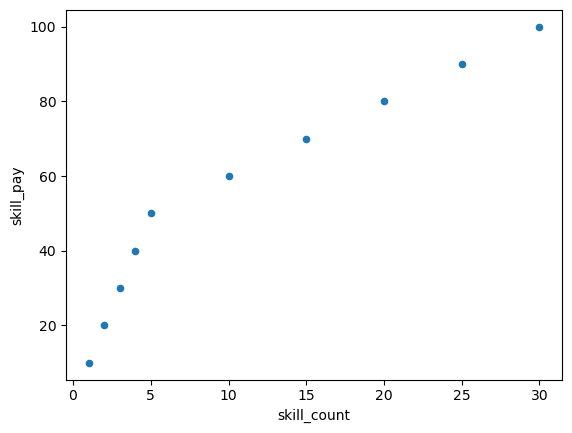

In [2]:
data = {
    'job_skills': ['python', 'sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
    'skill_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}

df = pd.DataFrame(data)

df.plot(kind='scatter', x='skill_count', y='skill_pay')

## Example 2:

In [7]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [9]:
# Explode the 'job_skills' into individual rows
df_exploded = df.explode('job_skills')
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [11]:
#We need to do a grouping, specificly for the job skills. We neeed to group the job skills in order to get the count of these skills
#We also, for the salary year avg column, need to aggregate for each of those skills the median salary

df_exploded = df.explode('job_skills')

df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count') #tuple(column we want to do the aggreation on, agrreation method )
)



,skill_count
job_skills,
airflow,2002
airtable,88
alteryx,4570
angular,376
angular.js,2
...,...
wrike,39
wsl,16
xamarin,2


In [12]:
df_exploded = df.explode('job_skills')

df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median') 
)


,skill_count,median_salary
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [19]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median') 
)

skill_stats.sort_values(by='skill_count', ascending=False).head(10)

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


In [21]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median') 
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

<Axes: xlabel='skill_count', ylabel='median_salary'>

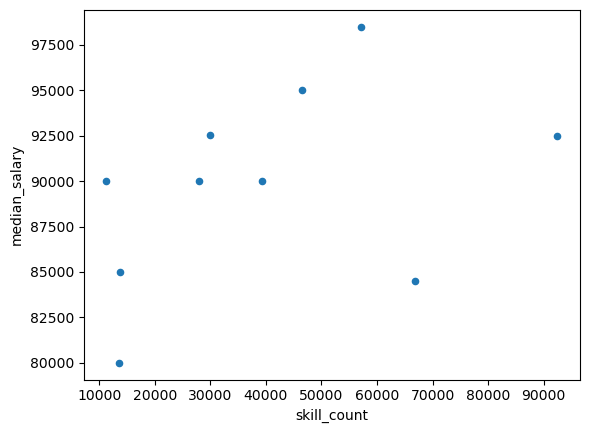

In [22]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

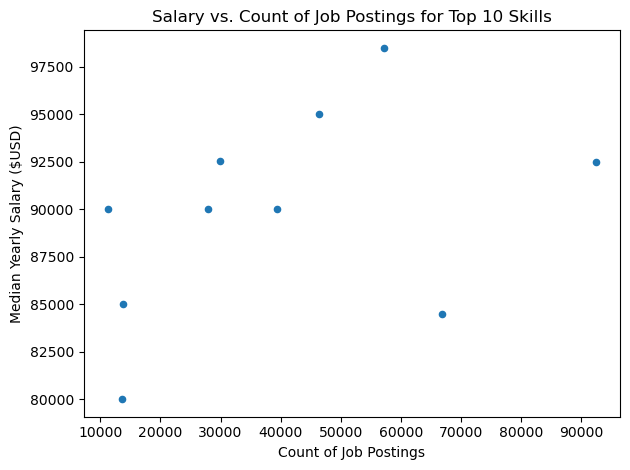

In [24]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

Matplotlib makes it a bit difficult to add the labels in the chart, which is why we will take about seaborn later
we could use the text function

### Add Annotations
#### Text
- text: Add text annotations to the plot.
#### Common Arguments
- x: The x-coordinate for the text
- y: The y-coordinate for the text
- s: The text to display
- fontsize: The font size of the text
- color: The color of the text
- ha: Horizontal alignment of the text
- va: Vertical alignment of the text

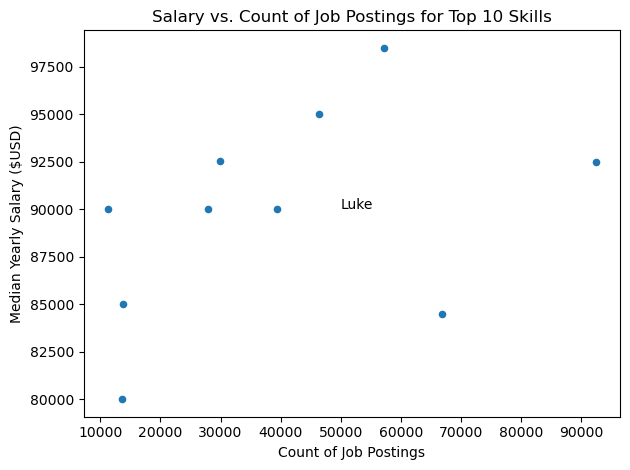

In [25]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

#plt.text(x, y, what you want to put in)
plt.text(50000, 90000, 'Luke') #we could go though each point to do this, or we could use python to do it for us

plt.show()

In [28]:
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


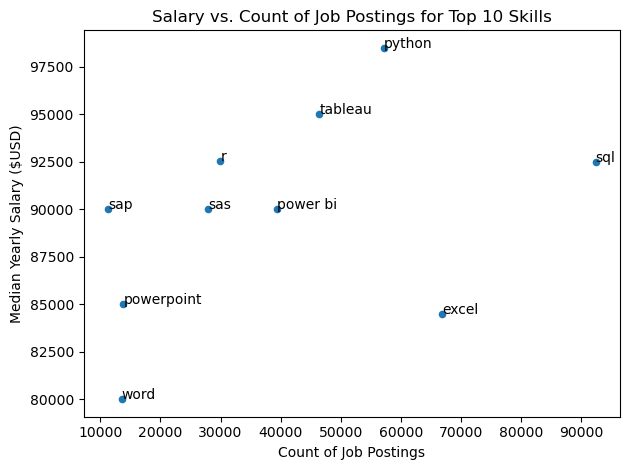

In [29]:
# Using Python
# We need to iterate through thr skill_stats df using a for loop
# Accessing the job skills column to get the name to provide to the text
# And for x and y coordinate, we just provide the appropiate from the column using something like iloc 
# Which we can access this index using the enumerate function
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt) 

plt.show()

Shows indemand skills and their salaries for data analyst

In [27]:
for i, txt in enumerate(skill_stats.index):
    print(i, txt)

0 sql
1 excel
2 python
3 tableau
4 power bi
5 r
6 sas
7 powerpoint
8 word
9 sap


___

In [32]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Course Practice Problems

- Create a scatter plot to compare the median yearly salary and the number of jobs based on the job_title_short column.
- To create the scatter plot first create a new DataFrame using the groupby() method to aggregate and find the median salary and job count for each job title.
- Annotate each point with the job title name.

(2.15.1)

    Use the .plot() method of the grouped DataFrame to create the scatter plot and plt.text() for labeling each point.

In [36]:
sp_df = df.groupby('job_title_short').agg(
    job_count=('job_title_short', 'count'),
    median_salary=('salary_year_avg', 'median') 
)
sp_df.sort_values(by='job_count', ascending=False).head(10)
#plt.show()

,job_count,median_salary
job_title_short,,
Data Analyst,196075,90000.0
Data Engineer,186241,125000.0
Data Scientist,172286,127500.0
Business Analyst,49063,85000.0
Software Engineer,44929,99150.0
Senior Data Engineer,44563,147500.0
Senior Data Scientist,36957,155500.0
Senior Data Analyst,29216,111175.0
Machine Learning Engineer,14080,106415.0


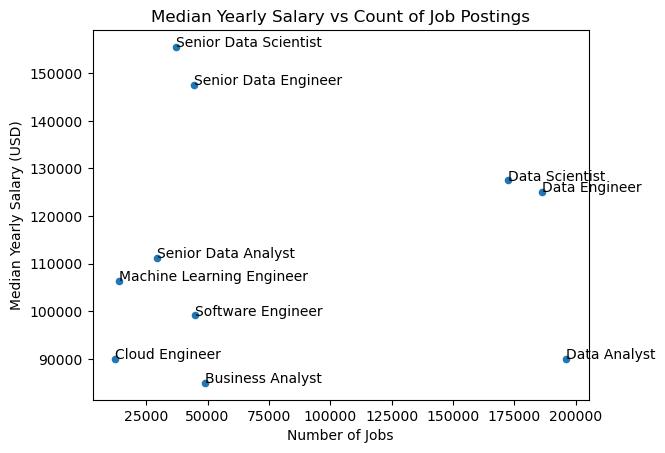

In [46]:
sp_df = df.groupby('job_title_short').agg(
    job_count=('job_title_short', 'count'),
    median_salary=('salary_year_avg', 'median') 
)
sp_df = sp_df.sort_values(by='job_count', ascending=False).head(10)
sp_df.plot(kind='scatter', x='job_count', y='median_salary')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary vs Count of Job Postings')

for i, txt in enumerate(sp_df.index):
    plt.text(sp_df['job_count'].iloc[i], sp_df['median_salary'].iloc[i], txt)

plt.show()

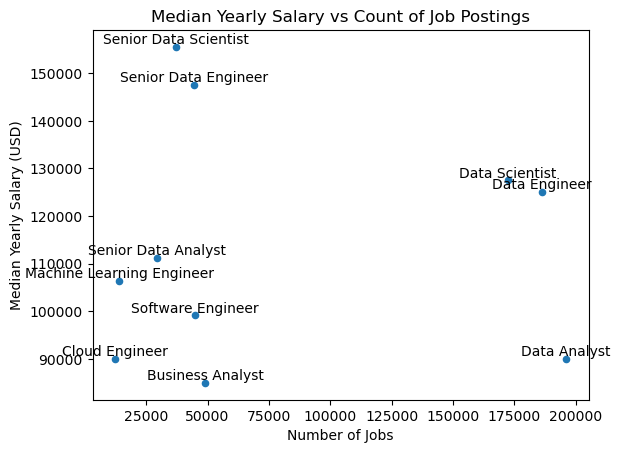

In [44]:
#Course Solution:

# Group data by job title and calculate average yearly salary and job count
job_title_stats = df.groupby('job_title_short').agg(
 median_salary_year_avg=('salary_year_avg', 'median'),
 job_count=('job_title_short', 'count')
).dropna()

# Plotting the results
job_title_stats.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary vs Count of Job Postings')

# Adding job title labels to each point
for i in range(len(job_title_stats)):
 job_count = job_title_stats['job_count'].iloc[i]
 mean_salary = job_title_stats['median_salary_year_avg'].iloc[i]
 job_title = job_title_stats.index[i]
 plt.text(job_count, mean_salary, job_title, ha='center', va='bottom')

plt.show()

Create a scatter plot to visualize the relationship between the number of job postings and median yearly salary for the top 7 countries based on highest number of job postings. Annotate each point with the country's name.

(2.15.2)

    Use the .plot() method of the grouped DataFrame to create the scatter plot, and the plt.text() function to add annotations for each data point.

In [40]:
scp_df = df.groupby('job_country').agg(
    job_count=('job_title_short', 'count'),
    median_salary=('salary_year_avg', 'median') 
)
scp_df.sort_values(by='job_count', ascending=False).head(7)

,job_count,median_salary
job_country,,
United States,206292,119187.5
India,51088,111175.0
United Kingdom,40375,104668.0
France,39922,97444.0
Germany,27694,111175.0
Spain,25100,98391.5
Singapore,23696,100500.0


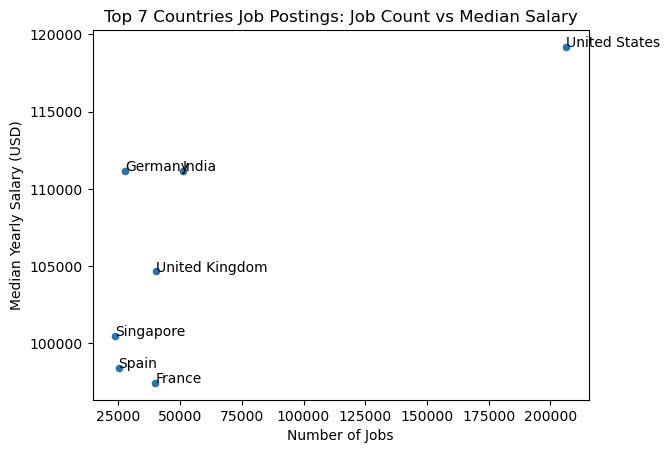

In [42]:
scp_df = df.groupby('job_country').agg(
    job_count=('job_title_short', 'count'),
    median_salary=('salary_year_avg', 'median') 
)
scp_df = scp_df.sort_values(by='job_count', ascending=False).head(7)
scp_df.plot(kind='scatter', x='job_count', y='median_salary')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings: Job Count vs Median Salary')

for i, txt in enumerate(scp_df.index):
    plt.text(scp_df['job_count'].iloc[i], scp_df['median_salary'].iloc[i], txt)

plt.show()

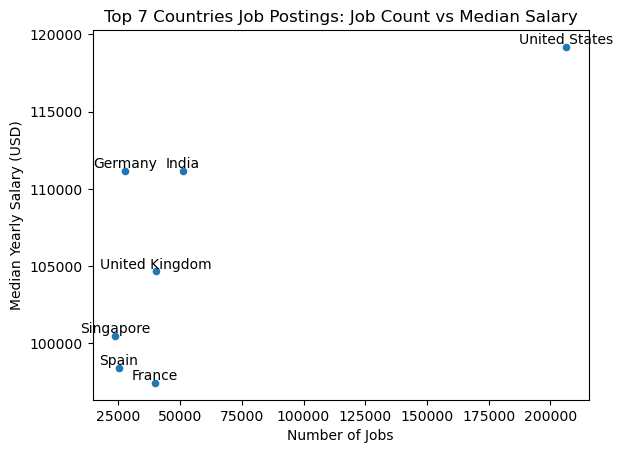

In [45]:
#Course Solution:

# Group data by country and calculate median hourly salary and job count
country_stats = df.groupby('job_country').agg(
 median_salary_year_avg=('salary_year_avg', 'median'),
 job_count=('job_country', 'count')
).dropna()

# Sort by job count in descending order and take the top 7
top_countries = country_stats.sort_values(by='job_count', ascending=False).head(7)

# Plotting the results
top_countries.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings: Job Count vs Median Salary')

# Adding country labels to each point
for i in range(len(top_countries)):
 job_count = top_countries['job_count'].iloc[i]
 mean_salary = top_countries['median_salary_year_avg'].iloc[i]
 country = top_countries.index[i]
 plt.text(job_count, mean_salary, country, ha='center', va='bottom')

plt.show()

- Create a scatter plot to visualize the relationship between the average yearly salary and the job count filtering a DataFrame for:
    - Data Analyst, Data Scientist, and Data Engineer positions in job_title_short
    - United States for the job_country
    - 'Full-time' and 'Contractor' for the job_schedule_type
    - Remove roles that do not have any yearly salary data.
- Combine the job_title_short and job_schedule_type into one column (called job_title_type) in the newly created DataFrame to use as the labels for the plot.
- For the plot use a for loop to cycle through the unique values in job_title_type and plot using the plt.scatter() function, specifying the label of job_title_type.
- Ensure the legend is appearing.
- Label the plot's axis and title appropriately.

Code Needed:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

(2.15.3) 

    Use the plt.scatter() function to generate the scatter plot, employing the label parameter to differentiate between the different job titles and job types.

In [56]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

filtered_df = df[
    (df['job_title_short'].isin(target_job_titles)) &
    (df['job_country'] == 'United States') &
    ((df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Contractor'))
].dropna(subset=['salary_year_avg'])

filtered_df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [78]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

filtered_df = df[
    (df['job_title_short'].isin(target_job_titles)) &
    (df['job_country'] == 'United States') &
    ((df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Contractor'))
].dropna(subset=['salary_year_avg'])

s_df =filtered_df.groupby(['job_schedule_type', 'job_title_short']).agg(
    job_count=('job_title_short', 'count'),
    avg_salary_avg=('salary_year_avg', 'mean') 
)
s_df.reset_index(inplace=True)
s_df

,job_schedule_type,job_title_short,job_count,avg_salary_avg
0,Contractor,Data Analyst,111,87027.197142
1,Contractor,Data Engineer,74,117772.326225
2,Contractor,Data Scientist,61,118568.074155
3,Full-time,Data Analyst,4097,95072.545202
4,Full-time,Data Engineer,2759,133804.432239
5,Full-time,Data Scientist,4325,140848.379828


In [86]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

filtered_df = df[
    (df['job_title_short'].isin(target_job_titles)) &
    (df['job_country'] == 'United States') &
    ((df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Contractor'))
].dropna(subset=['salary_year_avg'])

s_df =filtered_df.groupby(['job_schedule_type', 'job_title_short']).agg(
    job_count=('job_title_short', 'count'),
    avg_salary_avg=('salary_year_avg', 'mean') 
)
s_df.reset_index(inplace=True)

s_df['job_title_type'] = s_df['job_title_short'] + ' (' + s_df['job_schedule_type'] + ')'
s_df



,job_schedule_type,job_title_short,job_count,avg_salary_avg,job_title_type
0,Contractor,Data Analyst,111,87027.197142,Data Analyst (Contractor)
1,Contractor,Data Engineer,74,117772.326225,Data Engineer (Contractor)
2,Contractor,Data Scientist,61,118568.074155,Data Scientist (Contractor)
3,Full-time,Data Analyst,4097,95072.545202,Data Analyst (Full-time)
4,Full-time,Data Engineer,2759,133804.432239,Data Engineer (Full-time)
5,Full-time,Data Scientist,4325,140848.379828,Data Scientist (Full-time)


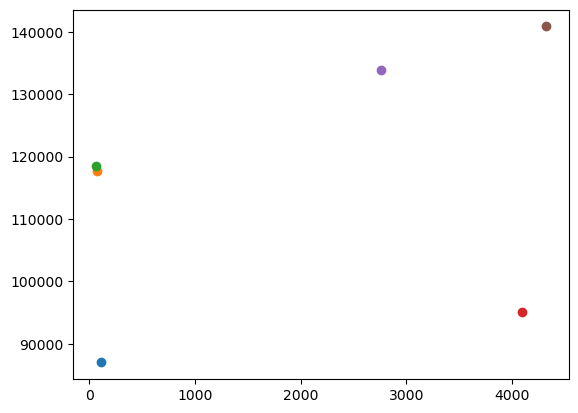

In [88]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

filtered_df = df[
    (df['job_title_short'].isin(target_job_titles)) &
    (df['job_country'] == 'United States') &
    ((df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Contractor'))
].dropna(subset=['salary_year_avg'])

s_df =filtered_df.groupby(['job_schedule_type', 'job_title_short']).agg(
    job_count=('job_title_short', 'count'),
    avg_salary_avg=('salary_year_avg', 'mean') 
)
s_df.reset_index(inplace=True)
s_df['job_title_type'] = s_df['job_title_short'] + ' (' + s_df['job_schedule_type'] + ')'

for job_title_type in s_df['job_title_type'].unique():
    scat_df = s_df[s_df['job_title_type'] == job_title_type]
    plt.scatter(scat_df['job_count'], scat_df['avg_salary_avg'], label=job_title_type)

plt.show()

In [89]:
for job_title_type in s_df['job_title_type'].unique():
    scat_df = s_df[s_df['job_title_type'] == job_title_type]
    print(job_title)

Software Engineer
Software Engineer
Software Engineer
Software Engineer
Software Engineer
Software Engineer


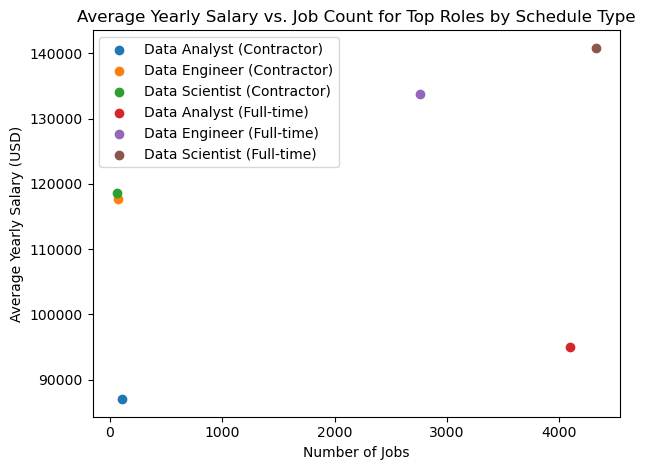

In [91]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

filtered_df = df[
    (df['job_title_short'].isin(target_job_titles)) &
    (df['job_country'] == 'United States') &
    ((df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Contractor'))
].dropna(subset=['salary_year_avg'])

s_df =filtered_df.groupby(['job_schedule_type', 'job_title_short']).agg(
    job_count=('job_title_short', 'count'),
    avg_salary_avg=('salary_year_avg', 'mean') 
)
s_df.reset_index(inplace=True)
s_df['job_title_type'] = s_df['job_title_short'] + ' (' + s_df['job_schedule_type'] + ')'

for job_title_type in s_df['job_title_type'].unique():
    scat_df = s_df[s_df['job_title_type'] == job_title_type]
    plt.scatter(scat_df['job_count'], scat_df['avg_salary_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.tight_layout()
plt.show()

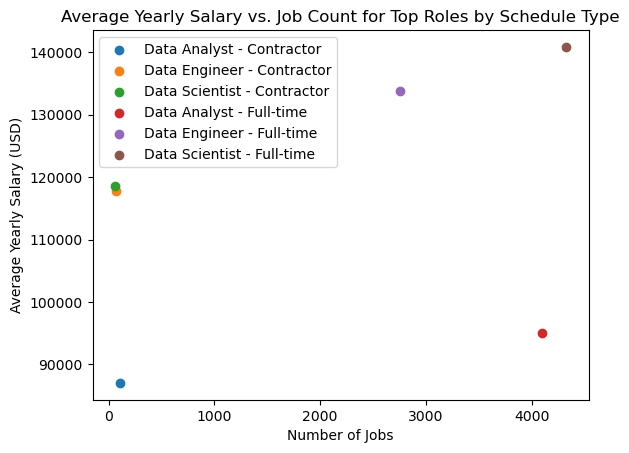

In [72]:
#Course Solution:

# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
 (df['job_country'] == 'United States') &
 (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
 (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
 mean_salary_year_avg=('salary_year_avg', 'mean'),
 job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
 subset = stats[stats['job_title_type'] == job_title_type]
 plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()